<h1>Starting</h1>

Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

Reading CSV

In [2]:
amz_price_df = pd.read_csv("C:/Users/dalmi/Documents/España/Data Analytics - IronHack/Labs/Semana 4/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
amz_price_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


<h1>Part 1: Analyzing Best-Seller Trends Across Product Categories</h1>

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [3]:
#Son dos categóricas

#Crosstab o tabla de frecuencias

crosstab_category_isBestSeller = pd.crosstab(index=amz_price_df['category'],
            columns='isBestSeller')
crosstab_category_isBestSeller

#Tabla de contingencia entre category y isBestSeller



col_0,isBestSeller
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [4]:
#Chequep las categorías con más Best Sellers

crosstab_category_isBestSeller.sort_values(by="isBestSeller", ascending=False)

col_0,isBestSeller
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
...,...
Motorbike Chassis,107
Plugs,107
Alexa Built-In Devices,107


In [5]:
#La categoría donde hay más cantidad de Best Sellers hay es Sports & Outdoors, con una frecuencia de 836.265

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [6]:
from scipy.stats import chi2_contingency

In [7]:
# Chi-square test for 'isBestSeller' and 'category'
test_chi2 = chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_category_isBestSeller)   #Devuelve 4 valores: statistic, pvalue, dof, expected_freq.
                                                                                            #Me interesa el pvalue
                                                                                            #Como el valor es 1, entonces rechazamos la H0, rechazamos que sean independientes

In [8]:
test_chi2   #Como el p-value >= 0,05 decimos que no hay evidencia para decir que hay relacion entre las varialbes

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[2.48000e+02],
       [4.06700e+03],
       [2.50000e+02],
       [1.69700e+03],
       [2.54000e+02],
       [8.53000e+03],
       [1.07000e+02],
       [2.58000e+02],
       [9.54900e+03],
       [1.50500e+04],
       [9.35600e+03],
       [2.39000e+02],
       [3.24000e+03],
       [9.47800e+03],
       [6.71000e+03],
       [5.28000e+02],
       [1.90920e+04],
       [2.78100e+03],
       [2.54000e+02],
       [4.06000e+02],
       [1.93120e+04],
       [3.11500e+03],
       [2.05000e+02],
       [6.30900e+03],
       [5.25100e+03],
       [9.55300e+03],
       [2.49000e+02],
       [9.49700e+03],
       [9.29100e+03],
       [1.89780e+04],
       [2.43000e+02],
       [1.40000e+02],
       [2.47000e+02],
       [9.11000e+02],
       [4.07400e+03],
       [1.17890e+04],
       [9.49000e+03],
       [8.13000e+03],
       [8.79800e+03],
       [2.49000e+02],
       [9.05800e+03],
       [2.50000e+02],
      

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

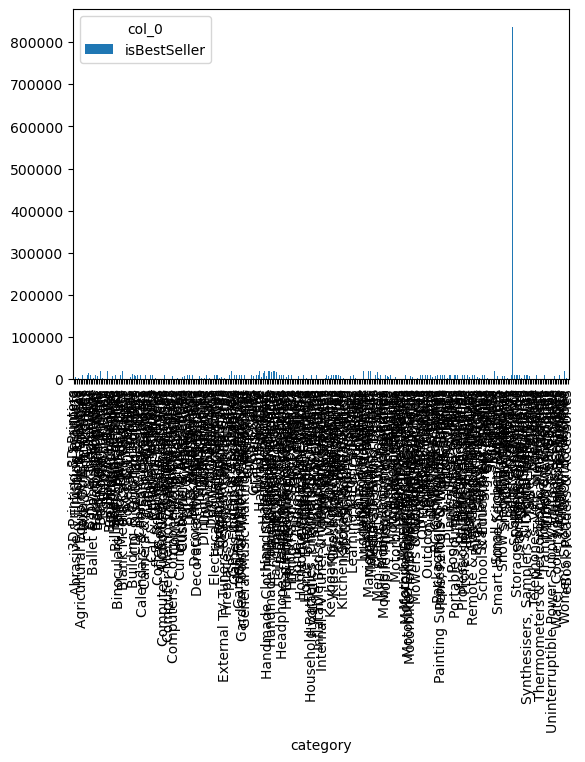

In [9]:
#Stacked Bar Chart para el crosstab calculado en línea 3

crosstab_category_isBestSeller.plot(kind='bar', stacked=True)
plt.show()

<h1>Part 2: Exploring Product Prices and Ratings Across Categories and Brands</h1>

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*


In [10]:
#Quartiles para las columnas price y stars

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [11]:
data_series = amz_price_df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series).index
print(outliers)

Index([     10,      19,      25,      28,      31,      33,      34,      35,
            36,      37,
       ...
       2443590, 2443591, 2443603, 2443613, 2443614, 2443619, 2443627, 2443638,
       2443641, 2443643],
      dtype='int64', length=327688)


In [12]:
#Elimino los outliers

amz_price_df2 = amz_price_df.copy()

amz_price_df2 = amz_price_df2.drop(index=outliers)

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [13]:
#Filtro las 20 primeras categorías por más vistas

top20_category = amz_price_df2.category.value_counts().head(20)
top20_category


category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

In [14]:
# Crear el Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=top20_category, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)  # Girar etiquetas de las categorías para mejor legibilidad
plt.title('Distribución de Precio en las Principales 20 Categorías de Producto')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

<Figure size 1200x800 with 0 Axes>

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

C:\Users\dalmi\AppData\Local\Temp\ipykernel_14228\787298649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_category_final, x="category", y="price", palette="coolwarm")


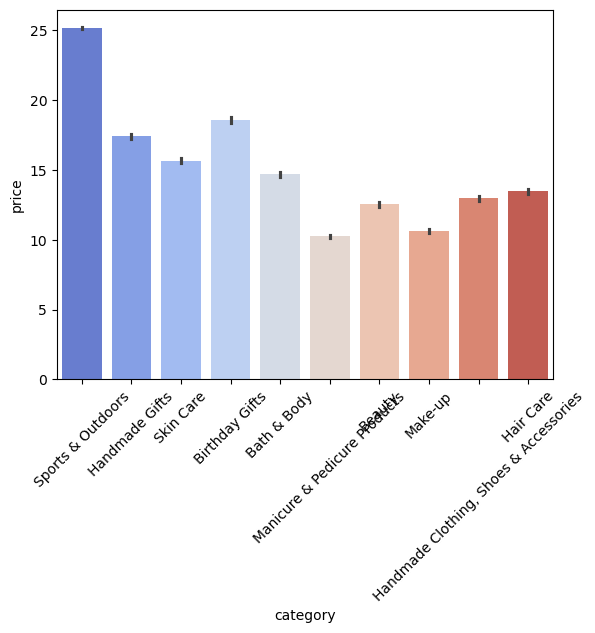

In [15]:
top10_category = amz_price_df2["category"].value_counts().head(10).index
top10_category_final = amz_price_df2[amz_price_df2['category'].isin(top10_category)]
sns.barplot(data=top10_category_final, x="category", y="price", palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Categorias Sports y Outdoors tienen los mayores promedios de precio medio

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\dalmi\AppData\Local\Temp\ipykernel_14228\3853190518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final10_ratings, x="category", y="stars", palette="coolwarm")


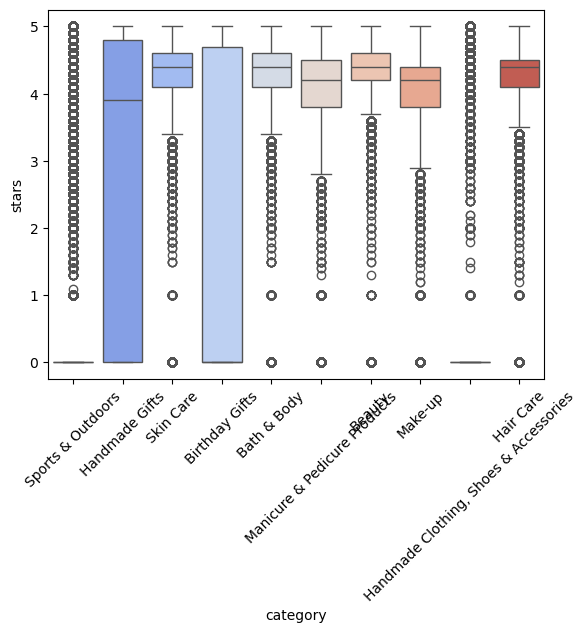

In [16]:
df_top10_ratings = amz_price_df2["category"].value_counts().head(10).index
df_final10_ratings= amz_price_df2[amz_price_df2['category'].isin(df_top10_ratings)]
sns.boxplot(data=df_final10_ratings, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [17]:
median_ratings = amz_price_df2.groupby("category")["stars"].median()
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()
highest_median_category, highest_median_rating

('Computer Memory', 4.7)

In [ ]:
#La categoría con la media de rating mas alta para clientes es "Computer Memory"

<h1>Part 2: Exploring Product Prices and Ratings Across Categories and Brands</h1>

Objective: Analyze how product ratings (stars) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [18]:
amz_price_df2.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [19]:
#Rating es una variable continua
#Product Price es una variable continua
#Usamos Pearson

amz_price_df2["price"].corr(amz_price_df2["stars"])

-0.0776729987818137

In [20]:
#Hay una pequeña correlacion entre Product Prices y Ratings en los productos de Amazon
#Chequeamos la hipótesis con el Spearman correlation coefficient

amz_price_df2["price"].corr(amz_price_df2["stars"], method="spearman")

-0.06679697280768314

In [ ]:
#Podemos confirmar que no hay correlación significativa entre precio de producto y sus ratings

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

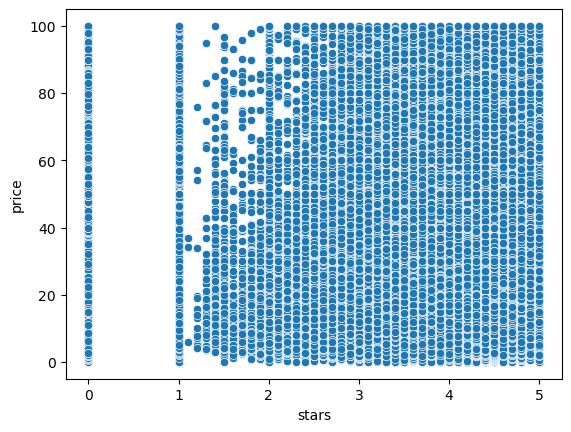

In [21]:
sns.scatterplot(data=amz_price_df2, x='stars', y='price')
plt.show()

In [ ]:
#Podemos observar que los ratings y el precio no están correlacionados

In [23]:
crosstab_result = pd.crosstab(index= amz_price_df2["price"],columns = amz_price_df2["stars"])
crosstab_result

stars,0.0,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
price,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,5,7,2,0,1
0.01,613,5,0,0,0,0,1,0,0,0,0,3,0,0,1,1,0,0,3,0,0,4,4,0,5,3,2,0,7,4,1,4,4,2,2,0,0,5,1,1,0,18
0.02,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.03,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.04,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99.95,101,5,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0,1,0,2,3,2,1,1,2,4,5,8,9,18,27,12,27,29,41,55,33,37,15,6,41
99.96,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,3,0,0,3,0,0,1
99.97,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,3,1,5,7,7,0,1,0,2


In [ ]:
sns.heatmap(crosstab_result, annot=True, cmap="Reds", fmt="d")
plt.show()

KeyboardInterrupt: 

In [ ]:
import statsmodels.api as sm
sm.qqplot(df['price'], line='s');
plt.show()